In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import os
from sklearn import preprocessing

In [98]:
files = os.listdir('../Data/rmsds')
first = True
data = pd.read_csv("../Data/rmsds/5HT2B_rmsds.csv")

for file in files:
    if file[-4:] == '.csv' and file != '5HT2B_rmsds.csv':
        fileData = pd.read_csv("../Data/rmsds/" + file)
        data = pd.concat([data, fileData])
data = data[data['secondary structure'] != -1]
test = data[(data['protein'] == 'MAPK14') & (data['start ligand'] == '2YIX') & (data['target ligand'] == '3D83')]
MAPK14_data = data[(data['protein'] != 'MAPK14') | (data['start ligand'] != '2YIX') | (data['target ligand'] != '3D83')]
no_MAPK14_data = data[(data['protein'] != 'MAPK14')]
MAPK14 = data[data['protein'] == 'MAPK14']
print("Data size", len(data))
print("Without 2YIX and 3D83 size", len(MAPK14_data))
print("2YIX and 3D83 size", len(test))
print("Without MAPK14 size", len(no_MAPK14_data))
print("MAPK14 size", len(MAPK14))



Data size 295046
Without 2YIX and 3D83 size 295013
2YIX and 3D83 size 33
Without MAPK14 size 283244
MAPK14 size 11802


In [99]:
# Not taking res name into account

X = data.drop(['protein', 'start ligand', 'target ligand', 'rmsd', 'bfactor', 'normalized bfactor', 'res name'], axis=1).values
y = data['rmsd'].values > 2
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Oversampling minority group

X_true = X_train[Y_train == True]
Y_true = Y_train[Y_train == True]

X_train_expanded = np.append(X_train_unnamed, X_true, axis=0)
Y_train_expanded = np.append(Y_train_unnamed, Y_true, axis=0)

for i in range(4):
    X_train_expanded = np.append(X_train_expanded, X_true, axis=0)
    Y_train_expanded = np.append(Y_train_expanded, Y_true, axis=0)
    
# Testing on 2YIX and 3D83 pairing
    
MAPK14_X = MAPK14_data.drop(['protein', 'start ligand', 'target ligand', 'rmsd', 'bfactor', 'normalized bfactor', 'res name'], axis=1).values
MAPK14_y = MAPK14_data['rmsd'].values > 2
MAPK14_X_train, MAPK14_X_test, MAPK14_Y_train, MAPK14_Y_test = train_test_split(MAPK14_X, MAPK14_y, test_size=0.3, random_state=5)

MAPK14_X_true = MAPK14_X_train[MAPK14_Y_train == True]
MAPK14_Y_true = MAPK14_Y_train[MAPK14_Y_train == True]

MAPK14_X_train_expanded = np.append(MAPK14_X_train, MAPK14_X_true, axis=0)
MAPK14_Y_train_expanded = np.append(MAPK14_Y_train, MAPK14_Y_true, axis=0)

for i in range(4):
    MAPK14_X_train_expanded = np.append(MAPK14_X_train_expanded, MAPK14_X_true, axis=0)
    MAPK14_Y_train_expanded = np.append(MAPK14_Y_train_expanded, MAPK14_Y_true, axis=0)
    
MAPK14_x_test = test.drop(['protein', 'start ligand', 'target ligand', 'rmsd', 'bfactor', 'normalized bfactor', 'res name'], axis=1).values
MAPK14_y_test = test['rmsd'].values > 2

# Without MAPK14

no_MAPK14_X = no_MAPK14_data.drop(['protein', 'start ligand', 'target ligand', 'rmsd', 'bfactor', 'normalized bfactor', 'res name'], axis=1).values
no_MAPK14_y = no_MAPK14_data['rmsd'].values > 2
no_MAPK14_X_train, no_MAPK14_X_test, no_MAPK14_Y_train, no_MAPK14_Y_test = train_test_split(no_MAPK14_X, no_MAPK14_y, test_size=0.3, random_state=5)

no_MAPK14_X_true = no_MAPK14_X_train[no_MAPK14_Y_train == True]
no_MAPK14_Y_true = no_MAPK14_Y_train[no_MAPK14_Y_train == True]

no_MAPK14_X_train_expanded = np.append(no_MAPK14_X_train, no_MAPK14_X_true, axis=0)
no_MAPK14_Y_train_expanded = np.append(no_MAPK14_Y_train, no_MAPK14_Y_true, axis=0)

for i in range(4):
    no_MAPK14_X_train_expanded = np.append(no_MAPK14_X_train_expanded, no_MAPK14_X_true, axis=0)
    no_MAPK14_Y_train_expanded = np.append(no_MAPK14_Y_train_expanded, no_MAPK14_Y_true, axis=0)
    
no_MAPK14_x_test = MAPK14.drop(['protein', 'start ligand', 'target ligand', 'rmsd', 'bfactor', 'normalized bfactor', 'res name'], axis=1).values
no_MAPK14_y_test = MAPK14['rmsd'].values > 2

In [87]:
print(np.sum(Y_train_expanded)/len(Y_train_expanded))
print(len(X_train))
print(len(Y_train))

0.4910942858695621
206532
206532


In [146]:
dict_classifiers = {
#     "Logistic Regression": LogisticRegression(),
#     "Nearest Neighbors": KNeighborsClassifier(),
#     "Linear SVM": SVC(),
#     "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Decision Tree with max depth = 5": tree.DecisionTreeClassifier(max_depth=5),
    "Decision Tree with max depth = 10": tree.DecisionTreeClassifier(max_depth=10),
    "Decision Tree with max depth = 15": tree.DecisionTreeClassifier(max_depth=15),
#     "Random Forest": RandomForestClassifier(n_estimators=1000),
#     "Neural Net": MLPClassifier(alpha = 1),
#     "Naive Bayes": GaussianNB(),
    #"AdaBoost": AdaBoostClassifier(),
    #"QDA": QuadraticDiscriminantAnalysis(),
    #"Gaussian Process": GaussianProcessClassifier()
}

In [152]:
def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 5, verbose = True, include_y_pred = False):
    """
    This method, takes as input the X, Y matrices of the Train and Test set.
    And fits them on all of the Classifiers specified in the dict_classifier.
    The trained models, and accuracies are saved in a dictionary. The reason to use a dictionary
    is because it is very easy to save the whole dictionary with the pickle module.
    
    Usually, the SVM, Random Forest and Gradient Boosting Classifier take quiet some time to train. 
    So it is best to train them on a smaller dataset first and 
    decide whether you want to comment them out or not based on the test accuracy score.
    """
    
    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        t_start = time.process_time()
        classifier.fit(X_train, Y_train)
        t_end = time.process_time()
        
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        Y_pred = classifier.predict(X_test)
        test_score = classifier.score(X_test, Y_test)
        recall = metrics.recall_score(Y_test, Y_pred)
        precision = metrics.precision_score(Y_test, Y_pred)
        
        if include_y_pred:
            dict_models[classifier_name] = {'model': classifier_name, 'train_score': train_score, 'test_score': test_score, 'recall_score': recall, 'precision_score': precision, 'train_time': t_diff, 'y_pred': Y_pred}
        else:
            dict_models[classifier_name] = {'model': classifier_name, 'train_score': train_score, 'test_score': test_score, 'recall_score': recall, 'precision_score': precision, 'train_time': t_diff}
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=classifier_name, f=t_diff))
    return dict_models

In [127]:
from ipykernel import kernelapp as app
dict_models = batch_classify(X_train, Y_train, X_test, Y_test)
print("Not taking res name into account:")
pd.DataFrame.from_dict(dict_models, orient='index')

trained Decision Tree in 0.67 s
trained Decision Tree  with max depth = 5 in 0.18 s
trained Decision Tree  with max depth = 10 in 0.36 s
trained Decision Tree  with max depth = 15 in 0.47 s
Not taking res name into account:


,model,train_score,test_score,recall_score,precision_score,train_time
Decision Tree,Decision Tree,0.928403,0.913776,0.595989,0.727528,0.673182
Decision Tree with max depth = 10,Decision Tree with max depth = 10,0.873385,0.872687,0.177350,0.631548,0.356628
Decision Tree with max depth = 15,Decision Tree with max depth = 15,0.889073,0.883792,0.276298,0.694341,0.473288
Decision Tree with max depth = 5,Decision Tree with max depth = 5,0.864994,0.866654,0.126726,0.567120,0.179250


In [128]:
dict_models = batch_classify(X_train, Y_train, X_test, Y_test)
print("Not taking res name into account:")
pd.DataFrame.from_dict(dict_models, orient='index')

trained Decision Tree in 0.70 s
trained Decision Tree  with max depth = 5 in 0.20 s
trained Decision Tree  with max depth = 10 in 0.38 s
trained Decision Tree  with max depth = 15 in 0.50 s
Not taking res name into account:


,model,train_score,test_score,recall_score,precision_score,train_time
Decision Tree,Decision Tree,0.928403,0.913765,0.595907,0.727501,0.700166
Decision Tree with max depth = 10,Decision Tree with max depth = 10,0.873385,0.872687,0.177350,0.631548,0.375982
Decision Tree with max depth = 15,Decision Tree with max depth = 15,0.889073,0.883792,0.276298,0.694341,0.498518
Decision Tree with max depth = 5,Decision Tree with max depth = 5,0.864994,0.866654,0.126726,0.567120,0.197774


In [129]:
dict_models = batch_classify(X_train_expanded, Y_train_expanded, X_test, Y_test)
print("Oversampling minority group:")
pd.DataFrame.from_dict(dict_models, orient='index')

trained Decision Tree in 2.71 s
trained Decision Tree  with max depth = 5 in 1.71 s
trained Decision Tree  with max depth = 10 in 2.30 s
trained Decision Tree  with max depth = 15 in 2.47 s
Oversampling minority group:


,model,train_score,test_score,recall_score,precision_score,train_time
Decision Tree,Decision Tree,0.900033,0.866936,0.851989,0.509585,2.713906
Decision Tree with max depth = 10,Decision Tree with max depth = 10,0.690284,0.719253,0.633218,0.274277,2.304730
Decision Tree with max depth = 15,Decision Tree with max depth = 15,0.748020,0.754423,0.697403,0.319732,2.466140
Decision Tree with max depth = 5,Decision Tree with max depth = 5,0.659049,0.687462,0.615631,0.245784,1.705558


In [147]:
MAPK14_dict_models = batch_classify(MAPK14_X_train_expanded, MAPK14_Y_train_expanded, MAPK14_x_test, MAPK14_y_test, include_y_pred=True)
print("MAPK14 example:")
pd.DataFrame.from_dict(MAPK14_dict_models, orient='index')
# print(Y_pred)
# print("Predicted number of flexible residues", np.sum(Y_pred))
# print(MAPK14_y_test)
# print("Actual number of flexible residues", np.sum(MAPK14_y_test))

trained Decision Tree in 2.71 s
trained Decision Tree with max depth = 5 in 1.61 s
trained Decision Tree with max depth = 10 in 2.24 s
trained Decision Tree with max depth = 15 in 2.43 s
MAPK14 example:


,model,train_score,test_score,recall_score,precision_score,train_time,y_pred
Decision Tree,Decision Tree,0.899723,0.818182,1.000000,0.600000,2.706844,"[True, True, True, False, False, False, False,..."
Decision Tree with max depth = 10,Decision Tree with max depth = 10,0.689443,0.818182,0.555556,0.714286,2.244574,"[True, True, True, False, False, False, False,..."
Decision Tree with max depth = 15,Decision Tree with max depth = 15,0.742760,0.787879,0.555556,0.625000,2.434776,"[True, True, False, False, False, False, False..."
Decision Tree with max depth = 5,Decision Tree with max depth = 5,0.659149,0.727273,0.222222,0.500000,1.612040,"[True, True, True, False, False, False, False,..."


In [148]:
no_MAPK14_dict_models = batch_classify(no_MAPK14_X_train_expanded, no_MAPK14_Y_train_expanded, MAPK14_x_test, MAPK14_y_test, include_y_pred=True)
print("MAPK14 example:")
pd.DataFrame.from_dict(no_MAPK14_dict_models, orient='index')
# print(no_MAPK14_Y_pred)
# print("Predicted number of flexible residues", np.sum(no_MAPK14_Y_pred))
# print(MAPK14_y_test)
# print("Actual number of flexible residues", np.sum(MAPK14_y_test))

trained Decision Tree in 2.60 s
trained Decision Tree with max depth = 5 in 1.50 s
trained Decision Tree with max depth = 10 in 2.24 s
trained Decision Tree with max depth = 15 in 2.42 s
MAPK14 example:


,model,train_score,test_score,recall_score,precision_score,train_time,y_pred
Decision Tree,Decision Tree,0.899487,0.636364,0.000000,0.000000,2.602130,"[False, False, False, False, False, False, Fal..."
Decision Tree with max depth = 10,Decision Tree with max depth = 10,0.690411,0.696970,0.111111,0.333333,2.241250,"[True, True, False, False, False, False, False..."
Decision Tree with max depth = 15,Decision Tree with max depth = 15,0.748418,0.727273,0.111111,0.500000,2.424904,"[False, True, False, False, False, False, Fals..."
Decision Tree with max depth = 5,Decision Tree with max depth = 5,0.658858,0.727273,0.111111,0.500000,1.501172,"[False, True, False, False, False, False, Fals..."


In [133]:
dict_models = batch_classify(no_MAPK14_X_train_expanded, no_MAPK14_Y_train_expanded, no_MAPK14_x_test, no_MAPK14_y_test, no_classifiers = 8)
print("Testing on all of MAPK14 without MAPK14 in train set:")
pd.DataFrame.from_dict(dict_models, orient='index')


trained Decision Tree in 2.60 s
trained Decision Tree  with max depth = 5 in 1.48 s
trained Decision Tree  with max depth = 10 in 2.31 s
trained Decision Tree  with max depth = 15 in 2.37 s
Testing on all of MAPK14 without MAPK14 in train set:


,model,train_score,test_score,recall_score,precision_score,train_time
Decision Tree,Decision Tree,0.899487,0.676834,0.333221,0.348780,2.598572
Decision Tree with max depth = 10,Decision Tree with max depth = 10,0.690411,0.699797,0.545792,0.423440,2.311296
Decision Tree with max depth = 15,Decision Tree with max depth = 15,0.748418,0.689968,0.443055,0.394642,2.369398
Decision Tree with max depth = 5,Decision Tree with max depth = 5,0.658858,0.708693,0.531599,0.433931,1.483190


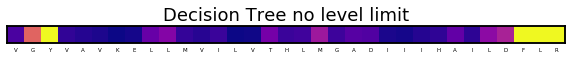

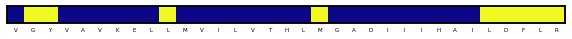

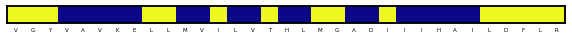

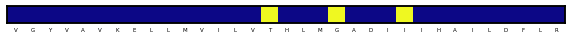

In [144]:
selected = test.loc[(test['start ligand'] == '2YIX') & (test['target ligand'] == '3D83')]
rmsd = np.array(selected['rmsd'])
rmsd[rmsd > 8] = 8
rmsd_formatted = np.expand_dims(rmsd, axis=0)
sns.set_context("talk", font_scale=1.0)

plt.imshow(rmsd_formatted, cmap="plasma", interpolation='none')

fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.title('Decision Tree no level limit')
plt.show()

bin_rmsd_formatted = np.expand_dims(MAPK14_y_test, axis=0)
sns.set_context("talk", font_scale=1.0)
plt.imshow(bin_rmsd_formatted, cmap="plasma", interpolation='none')
fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.show()

bin_pred_rmsd_formatted = np.expand_dims(MAPK14_dict_models['Decision Tree']['y_pred'], axis=0)
sns.set_context("talk", font_scale=1.0)
plt.imshow(bin_pred_rmsd_formatted, cmap="plasma", interpolation='none')
fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.show()

bin_pred_rmsd_formatted = np.expand_dims(no_MAPK14_dict_models['Decision Tree']['y_pred'], axis=0)
sns.set_context("talk", font_scale=1.0)
plt.imshow(bin_pred_rmsd_formatted, cmap="plasma", interpolation='none')
fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.show()

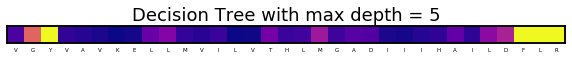

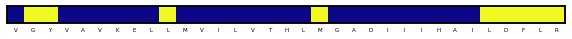

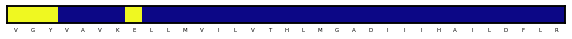

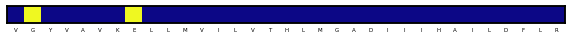

In [149]:
selected = test.loc[(test['start ligand'] == '2YIX') & (test['target ligand'] == '3D83')]
rmsd = np.array(selected['rmsd'])
rmsd[rmsd > 8] = 8
rmsd_formatted = np.expand_dims(rmsd, axis=0)
sns.set_context("talk", font_scale=1.0)

plt.imshow(rmsd_formatted, cmap="plasma", interpolation='none')

fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.title('Decision Tree with max depth = 5')
plt.show()

bin_rmsd_formatted = np.expand_dims(MAPK14_y_test, axis=0)
sns.set_context("talk", font_scale=1.0)
plt.imshow(bin_rmsd_formatted, cmap="plasma", interpolation='none')
fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.show()

bin_pred_rmsd_formatted = np.expand_dims(MAPK14_dict_models['Decision Tree with max depth = 5']['y_pred'], axis=0)
sns.set_context("talk", font_scale=1.0)
plt.imshow(bin_pred_rmsd_formatted, cmap="plasma", interpolation='none')
fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.show()

bin_pred_rmsd_formatted = np.expand_dims(no_MAPK14_dict_models['Decision Tree with max depth = 5']['y_pred'], axis=0)
sns.set_context("talk", font_scale=1.0)
plt.imshow(bin_pred_rmsd_formatted, cmap="plasma", interpolation='none')
fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.show()

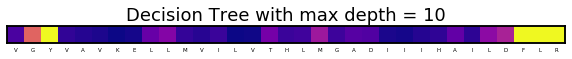

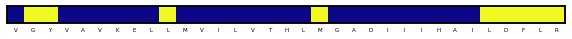

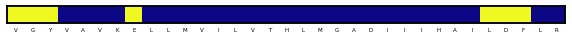

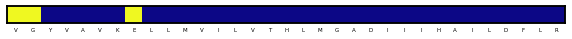

In [150]:
selected = test.loc[(test['start ligand'] == '2YIX') & (test['target ligand'] == '3D83')]
rmsd = np.array(selected['rmsd'])
rmsd[rmsd > 8] = 8
rmsd_formatted = np.expand_dims(rmsd, axis=0)
sns.set_context("talk", font_scale=1.0)

plt.imshow(rmsd_formatted, cmap="plasma", interpolation='none')

fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.title('Decision Tree with max depth = 10')
plt.show()

bin_rmsd_formatted = np.expand_dims(MAPK14_y_test, axis=0)
sns.set_context("talk", font_scale=1.0)
plt.imshow(bin_rmsd_formatted, cmap="plasma", interpolation='none')
fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.show()

bin_pred_rmsd_formatted = np.expand_dims(MAPK14_dict_models['Decision Tree with max depth = 10']['y_pred'], axis=0)
sns.set_context("talk", font_scale=1.0)
plt.imshow(bin_pred_rmsd_formatted, cmap="plasma", interpolation='none')
fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.show()

bin_pred_rmsd_formatted = np.expand_dims(no_MAPK14_dict_models['Decision Tree with max depth = 10']['y_pred'], axis=0)
sns.set_context("talk", font_scale=1.0)
plt.imshow(bin_pred_rmsd_formatted, cmap="plasma", interpolation='none')
fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.show()

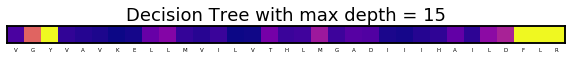

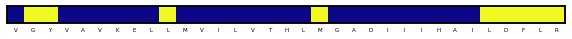

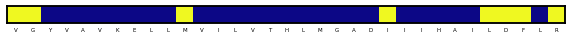

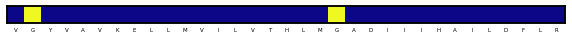

In [151]:
selected = test.loc[(test['start ligand'] == '2YIX') & (test['target ligand'] == '3D83')]
rmsd = np.array(selected['rmsd'])
rmsd[rmsd > 8] = 8
rmsd_formatted = np.expand_dims(rmsd, axis=0)
sns.set_context("talk", font_scale=1.0)

plt.imshow(rmsd_formatted, cmap="plasma", interpolation='none')

fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.title('Decision Tree with max depth = 15')
plt.show()

bin_rmsd_formatted = np.expand_dims(MAPK14_y_test, axis=0)
sns.set_context("talk", font_scale=1.0)
plt.imshow(bin_rmsd_formatted, cmap="plasma", interpolation='none')
fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.show()

bin_pred_rmsd_formatted = np.expand_dims(MAPK14_dict_models['Decision Tree with max depth = 15']['y_pred'], axis=0)
sns.set_context("talk", font_scale=1.0)
plt.imshow(bin_pred_rmsd_formatted, cmap="plasma", interpolation='none')
fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.show()

bin_pred_rmsd_formatted = np.expand_dims(no_MAPK14_dict_models['Decision Tree with max depth = 15']['y_pred'], axis=0)
sns.set_context("talk", font_scale=1.0)
plt.imshow(bin_pred_rmsd_formatted, cmap="plasma", interpolation='none')
fig = plt.gcf()
fig.set_size_inches(10,3)

ax = plt.gca()
labels = [r for r in selected['res name']]
plt.xticks(np.arange(0,len(selected)),labels)
plt.yticks([],[])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.tick_params(axis='both', labelsize=5.5)

#plt.colorbar()
plt.show()